## Consumer's Utiity Maximization Problem

There are many consumers in an economy whose labor productivity $x$ and non-labor income $\pi$ are different. An individual consumer is endowed with one unit of time that can be used on either working to make money for consumption or enjoying as leisure. The wage per hour is given by $w$ that is determined in the market. The utility function of the consumer is given by $ u(c, l) = c^{\frac{1}{3}} l^{\frac{2}{3}}$, where $c$ and $l$ denote consumption and leisure respectively.

Q1. Solve an individual consumer's utility maximization problem to derive the optimal consumption ($c^*$), leisure ($l^*$) and the labor supply ($N^s$). Be careful for the corner solutions. Write the Latex code for your answers or include the scanned image file in the following Markdown cell. When you submit your Jupyter Notebook file, **you should also upload your image file together**

include answer file here
<img src="CoEx1_2018121022_박진효.jpg">

Q2. Write the Python function to compute the $(c^*, l^*, N^s$) for an individual consumer.

In [44]:
# your code here
def opt_cons(x, w, pi, t=1):   
    consumption_opt = (x*w+pi)/3
    leisure_opt = 2/3+2*pi/(3*x*w)
    labor_supply = 1/3-2*pi/(3*x*w)
    if leisure_opt>1 or labor_supply<0:
        consumption_opt = pi
        leisure_opt = 1
        labor_supply = 0
    return (consumption_opt, leisure_opt, labor_supply)

Q3. For the time being, assume that $w=2$ and $\sigma_x=0.3$. Then do the following using the function that you wrote above. 

Q3-1. Draw the graphs for the optimal consumption and leisure for 30 individuals whose log productivities are equally distributed over the range $\log{x} \in [-3\sigma_x, +3\sigma_x]$, but non-labor incomes are identical at $\pi=\frac{1}{2}$.

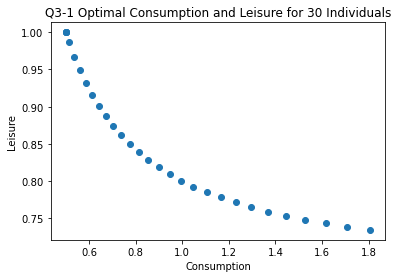

In [45]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

w = 2
sigma = 0.3

# Generate log productivity values for 30 individuals
log_x_values = np.linspace(-3*sigma, 3*sigma, 30)

# Convert log productivity values to productivity values
x_values = np.exp(log_x_values)

# Calculate optimal consumption and leisure for each individual
optimal_consumptions = []
optimal_leisures = []
for x in x_values:
    consumption_opt, leisure_opt, labor_supply = opt_cons(x, w, 0.5)
    optimal_consumptions.append(consumption_opt)
    optimal_leisures.append(leisure_opt)

# Plot optimal consumption and leisure for each individual
plt.plot(optimal_consumptions,optimal_leisures, 'o')
plt.xlabel('Consumption')
plt.ylabel('Leisure')
plt.title('Q3-1 Optimal Consumption and Leisure for 30 Individuals')
plt.show()

Q3-2. Draw the graphs for the optimal consumption and leisure for 30 individuals whose productivities are identical at $x=\sigma_x$, but non-labor incomes are equally distributed over the whole range of $\pi$, i.e., $\pi \in [0, 1]$.

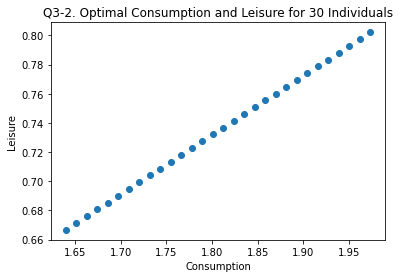

In [46]:
# your code here

# Generate non-labor income values for 30 individuals
pi_values = np.linspace(0, 1, 30)

# Calculate optimal consumption and leisure for each individual
optimal_consumptions_2 = []
optimal_leisures_2 = []
for pi in pi_values:
    consumption_opt_2, leisure_opt_2, labor_supply_2 = opt_cons(x, w, pi)
    optimal_consumptions_2.append(consumption_opt_2)
    optimal_leisures_2.append(leisure_opt_2)

# Plot optimal consumption and leisure for each individual
plt.plot(optimal_consumptions_2,optimal_leisures_2, 'o')
plt.xlabel('Consumption')
plt.ylabel('Leisure')
plt.title('Q3-2. Optimal Consumption and Leisure for 30 Individuals')
plt.show()

Q3-3. Draw the graphs (3-D surface plots) for the optimal consumption and leisure for individuals whose log productivities are equally distributed over the range of $\log{x} \in [-3\sigma_x, +3\sigma_x]$ and non-labor incomes are equally distributed over the rnage of $\pi\in [0, \bar{\pi}]$.

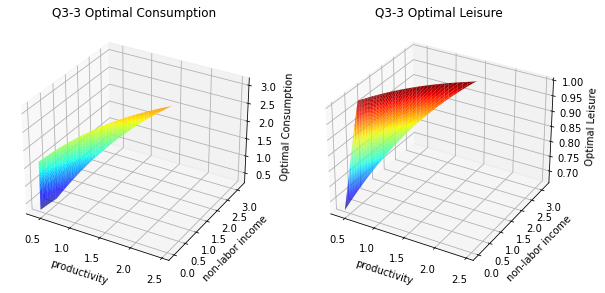

In [47]:
# your code here
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

# Generate range of x and pi values
log_x_values = np.linspace(-3*sigma, 3*sigma, 100)
x_values_2 = np.exp(log_x_values)
pi_values_2 = np.linspace(0, np.pi, 100)

# Calculate optimal consumption and leisure for each combination of x and pi
consumption_opt_3 = np.zeros((len(x_values_2), len(pi_values_2)))
leisure_opt_3 = np.zeros((len(x_values_2), len(pi_values_2)))
for i, x in enumerate(x_values_2):
    for j, pi in enumerate(pi_values_2):
        consumption_opt_3[i,j], leisure_opt_3[i,j], _ = opt_cons(x, 2, pi)
        
# Plot 3D surface plots
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_values_2, pi_values_2, consumption_opt_3, cmap=cm.jet)
ax1.set_xlabel('productivity')
ax1.set_ylabel('non-labor income')
ax1.set_zlabel('Optimal Consumption')
ax1.set_title('Q3-3 Optimal Consumption')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_values_2, pi_values_2, leisure_opt_3, cmap=cm.jet)
ax2.set_xlabel('productivity')
ax2.set_ylabel('non-labor income')
ax2.set_zlabel('Optimal Leisure')
ax2.set_title('Q3-3 Optimal Leisure')

plt.show()

Q3-4. Draw the labor supply curve for the following four individuals as the market wage varies over the range of $w\in[1,4]$.

- Individual 1: $\log{x} = -\sigma_x$ and $\pi = 0.4$
- Individual 2: $\log{x} = -\sigma_x$ and $\pi = 0.6$
- Individual 3: $\log{x} = \sigma_x$ and $\pi = 0.4$
- Individual 4: $\log{x} = \sigma_x$ and $\pi = 0.6$

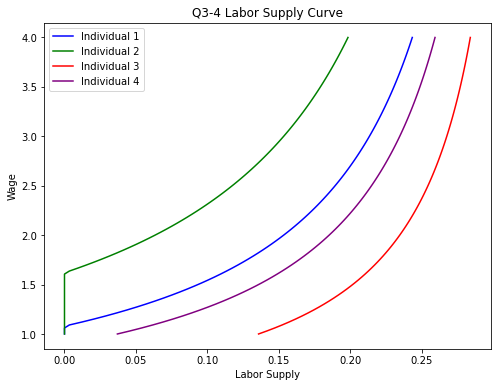

In [48]:
# your code here

# Parameters for the individuals
params = [(-0.3, 0.4), (-0.3, 0.6), (0.3, 0.4), (0.3, 0.6)]

# Define the range of wages
w_range = np.linspace(1, 4, 100)

# Initialize an empty list to store the labor supply for each individual
labor_supply_list = []

# Loop over the range of wages and calculate the labor supply for each individual
for param in params:
    labor_supply_i_list = []
    for w in w_range:
        x, pi = param
        labor_supply_i = opt_cons(np.exp(x), w, pi)[2]
        labor_supply_i_list.append(labor_supply_i)
    labor_supply_list.append(labor_supply_i_list)

# Plot the labor supply curve for each individual
plt.figure(figsize=(8, 6))
labels = ['Individual 1', 'Individual 2', 'Individual 3', 'Individual 4']
colors = ['blue', 'green', 'red', 'purple']
for i, label in enumerate(labels):
    plt.plot(labor_supply_list[i], w_range, label=label, color=colors[i])
plt.title('Q3-4 Labor Supply Curve')
plt.xlabel('Labor Supply')
plt.ylabel('Wage')
plt.legend()
plt.show()

Q4. Suppose that there are 100,000 individuals in the economy whose labor productivities are drawn from the following distributionis: $\log{x}\sim N(0, \sigma_x^2)$. The non-labor incomes of one half of the individuals are 0.4 and those of the other half are 0.6. Each individual behaves according to the utility maximization problem described above. Using the function that you write above, do the following.  


Q4-1. Generate 100,000 individuals and compute their labor supply assuming the market wage being equal to 2. Then draw histograms of the individual labor supplies of the two groups.

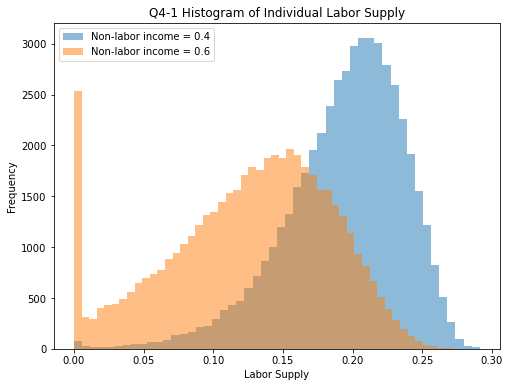

In [49]:
# your code here

# Define the parameters for the individuals
n = 100000
x_dist = np.exp(np.random.normal(0, 0.3,n))
pi_dist = np.concatenate((np.full(n//2, 0.4), np.full(n//2, 0.6)))

# Define the wage
w = 2

# Compute the labor supply for each individual
labor_supply = []
for i in range(n):
    x, pi = x_dist[i], pi_dist[i]
    labor_supply_i = opt_cons(x, w, pi)[2]
    labor_supply.append(labor_supply_i)

# Draw histograms of the individual labor supplies of the two groups
plt.figure(figsize=(8, 6))
plt.hist(labor_supply[0:n//2], bins=50, alpha=0.5)
plt.hist(labor_supply[n//2:], bins=50, alpha=0.5)
plt.title('Q4-1 Histogram of Individual Labor Supply')
plt.xlabel('Labor Supply')
plt.ylabel('Frequency')
plt.legend(('Non-labor income = 0.4','Non-labor income = 0.6'))
plt.show()

Q4-2. Then draw histograms of the individual labor supplies of the whole economy.

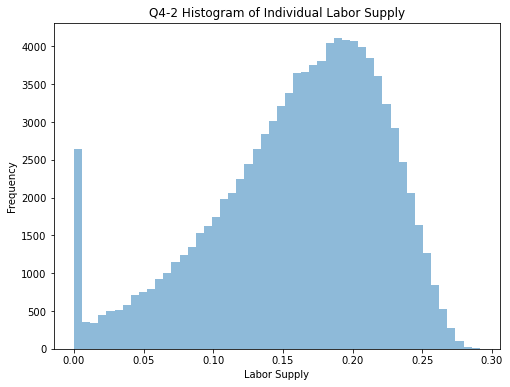

In [50]:
# your code here

# Draw histograms of the individual labor supplies of the whole economy
plt.figure(figsize=(8, 6))
plt.hist(labor_supply, bins=50, alpha=0.5)
plt.title('Q4-2 Histogram of Individual Labor Supply')
plt.xlabel('Labor Supply')
plt.ylabel('Frequency')
plt.show()

Q4-3. Draw the aggregate labor supply curve as the market wage varies over the range of $w\in[1,4]$.


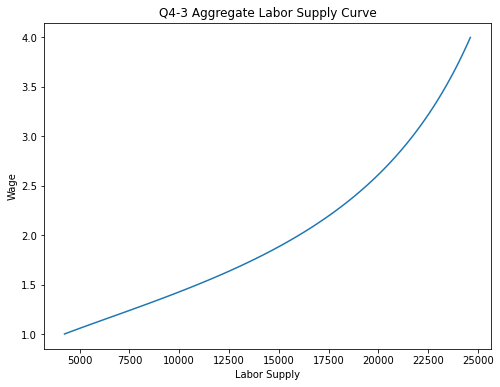

In [52]:
# your code here

# Set the range of wages
w_range_2 = np.linspace(1, 4, 100)

# Calculate the aggregate labor supply for each wage in the range
labor_supply_agg = []
for i, w in enumerate(w_range_2):
    labor_supply_w = 0
    for j in range(n):
        x, pi = x_dist[j], pi_dist[j]
        labor_supply_w += opt_cons(x, w, pi)[2]
    labor_supply_agg.append(labor_supply_w)

# Plot the aggregate labor supply curve
plt.figure(figsize=(8, 6))
plt.plot(labor_supply_agg, w_range_2)
plt.title('Q4-3 Aggregate Labor Supply Curve')
plt.xlabel('Labor Supply')
plt.ylabel('Wage')
plt.show()